# Practical Bioinformatics / Genes prediction

## Task 1 - Comparison of Genemark predictions with a GenBank entry for a plasmid.

**A plasmid** is a small, extrachromosomal DNA molecule within a cell that is physically separated from chromosomal DNA and can replicate independently.

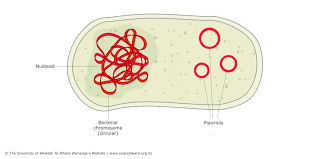

1.1 Download the file of the needed plasmid - CP000397.1.

In [1]:
pip install biopython

In [2]:
import os
from Bio import SeqIO
from Bio import Entrez

Entrez.email = "ivasik777@gmail.com" # Always tell NCBI who you are
filename = "CP000397.1.gb"
if not os.path.isfile(filename):
  net_handle = Entrez.efetch(db="nucleotide", id="CP000397.1", rettype="gb", retmode="text")
  out_handle = open(filename, "w")
  out_handle.write(net_handle.read())
  out_handle.close()
  net_handle.close()

record = SeqIO.read(filename, "gb")
print(record)

ID: CP000397.1
Name: CP000397
Description: Borrelia afzelii PKo plasmid lp60-2, complete sequence
Database cross-references: BioProject:PRJNA17057, BioSample:SAMN02641500
Number of features: 119
/molecule_type=DNA
/topology=linear
/data_file_division=BCT
/date=14-JUL-2016
/accessions=['CP000397']
/sequence_version=1
/keywords=['']
/source=Borreliella afzelii PKo
/organism=Borreliella afzelii PKo
/taxonomy=['Bacteria', 'Spirochaetes', 'Spirochaetales', 'Borreliaceae', 'Borreliella']
/references=[Reference(title='Comparative genome analysis: selection pressure on the Borrelia vls cassettes is essential for infectivity', ...), Reference(title='Direct Submission', ...)]
/comment=Linear plasmid lacks terminal end sequences.
Seq('AGAAATATGAGGATTTAATTAATCCTGTAGCACCTTCAGTATCATTAAATAATA...GTT')


In [3]:
len(record.seq) # the size of the plasmid in bp

59804

In [4]:
# to check how many genes are 
data = open("CP000397.1.gb").read()
count = data.count("gene")
count

59

Description of the plasmid:

- to which organism does it belong: Borrelia afzelii (strain PKo);

- size (in base pairs): 59804 bp;

- number of genes (specify if there are pseudogenes and/or tRNAs): 59 genes.

1.2 Extract information from the file about the coordinates of the coding DNA sequences (beginning, end, orientation).

*the coding region of a gene, also known as the coding DNA sequence (CDS), is the portion of a gene's DNA (or RNA) that codes for protein.*

*sequence can be in direct or complement orientation.*

In [5]:
cds = []
with open("CP000397.1.gb", "r") as f:
    data = f.readlines()
for line in data:
    if "CDS" in line:
      print(line)
      cds.append(line)

# if there is no 'complement' locating near start and end coordinates ->
# -> this is direct orientation

     CDS             120..683

     CDS             866..1363

     CDS             complement(1360..1545)

     CDS             1777..1989

     CDS             2513..3337

     CDS             3901..4251

     CDS             4400..5080

     CDS             5952..6845

     CDS             complement(7447..11277)

     CDS             complement(11397..11627)

     CDS             complement(11700..11903)

     CDS             complement(11818..11961)

     CDS             12703..13620

     CDS             13613..14179

     CDS             14152..14907

     CDS             15003..15632

     CDS             15791..16135

     CDS             16427..16534

     CDS             complement(16914..17174)

     CDS             complement(17628..18611)

     CDS             19291..20145

     CDS             complement(20892..21902)

     CDS             22598..23146

     CDS             complement(23546..24028)

     CDS             complement(24605..24928)

     CDS             comp

1.3 Predict the genes in the plasmid using Genemark and then extract information about the coordinates of the predicted genes (start, end, orientation).

*Genemark* is a family of gene prediction programs (developed at Georgia Institute of Technology , Atlanta, Georgia, USA) (http://topaz.gatech.edu/GeneMark/).

In this HW, I've used GeneMark.hmm prokaryotic (http://topaz.gatech.edu/genemark/gmhmmp.cgi): 

Section - Gene Prediction in Bacteria, Archaea, Metagenomes and Metatranscriptomes: "For many species pre-trained model parameters are ready and available through the GeneMark.hmm page."

In [6]:
# Genemark requires fasta file (so, let's download it from genbank)
filename = "CP000397.1.fasta"
if not os.path.isfile(filename):
  net_handle = Entrez.efetch(db="nucleotide", id="CP000397.1", rettype="fasta", retmode="text")
  out_handle = open(filename, "w")
  out_handle.write(net_handle.read())
  out_handle.close()
  net_handle.close()

record = SeqIO.read(filename, "fasta")
print(record)

ID: CP000397.1
Name: CP000397.1
Description: CP000397.1 Borrelia afzelii PKo plasmid lp60-2, complete sequence
Number of features: 0
Seq('AGAAATATGAGGATTTAATTAATCCTGTAGCACCTTCAGTATCATTAAATAATA...GTT')


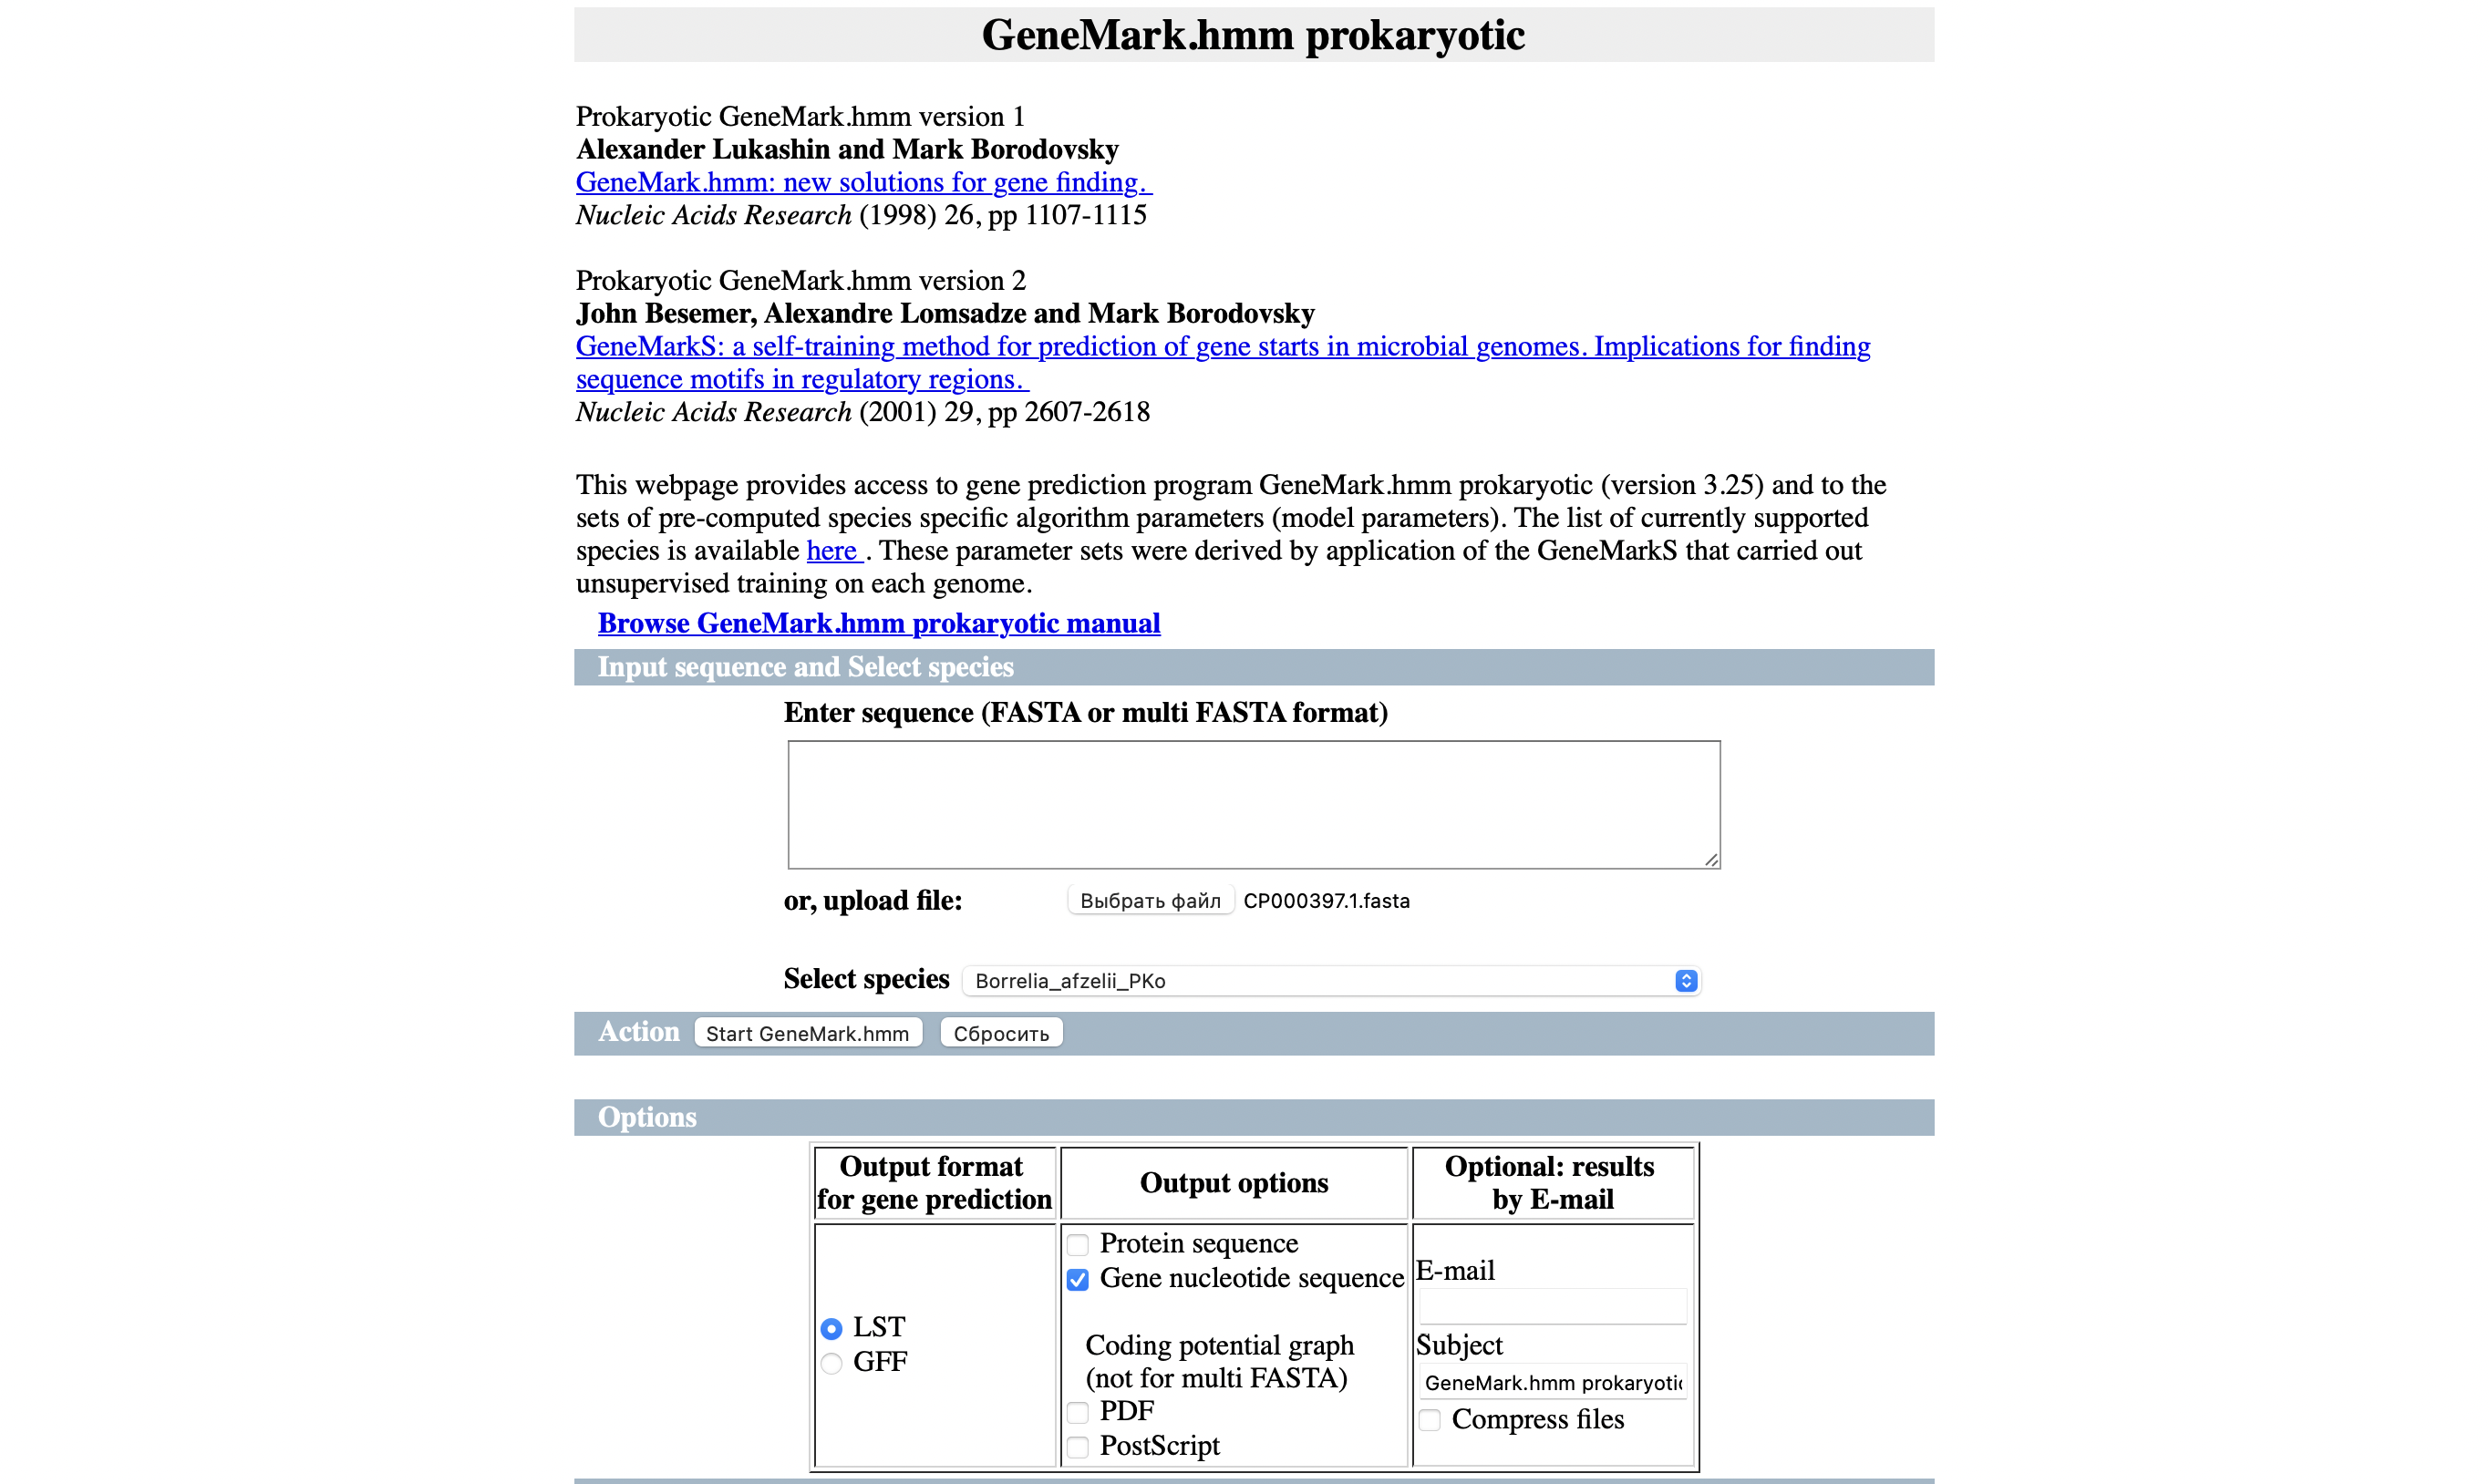

Options for Genemark running:
- Select species: Borrelia_afzelii_PKo.
- Output format for gene prediction: LST (default).
- Output options: Gene nucleotide sequence.

The output looks like that (+ it was downloaded - *gmhmmp.out.fnn*).

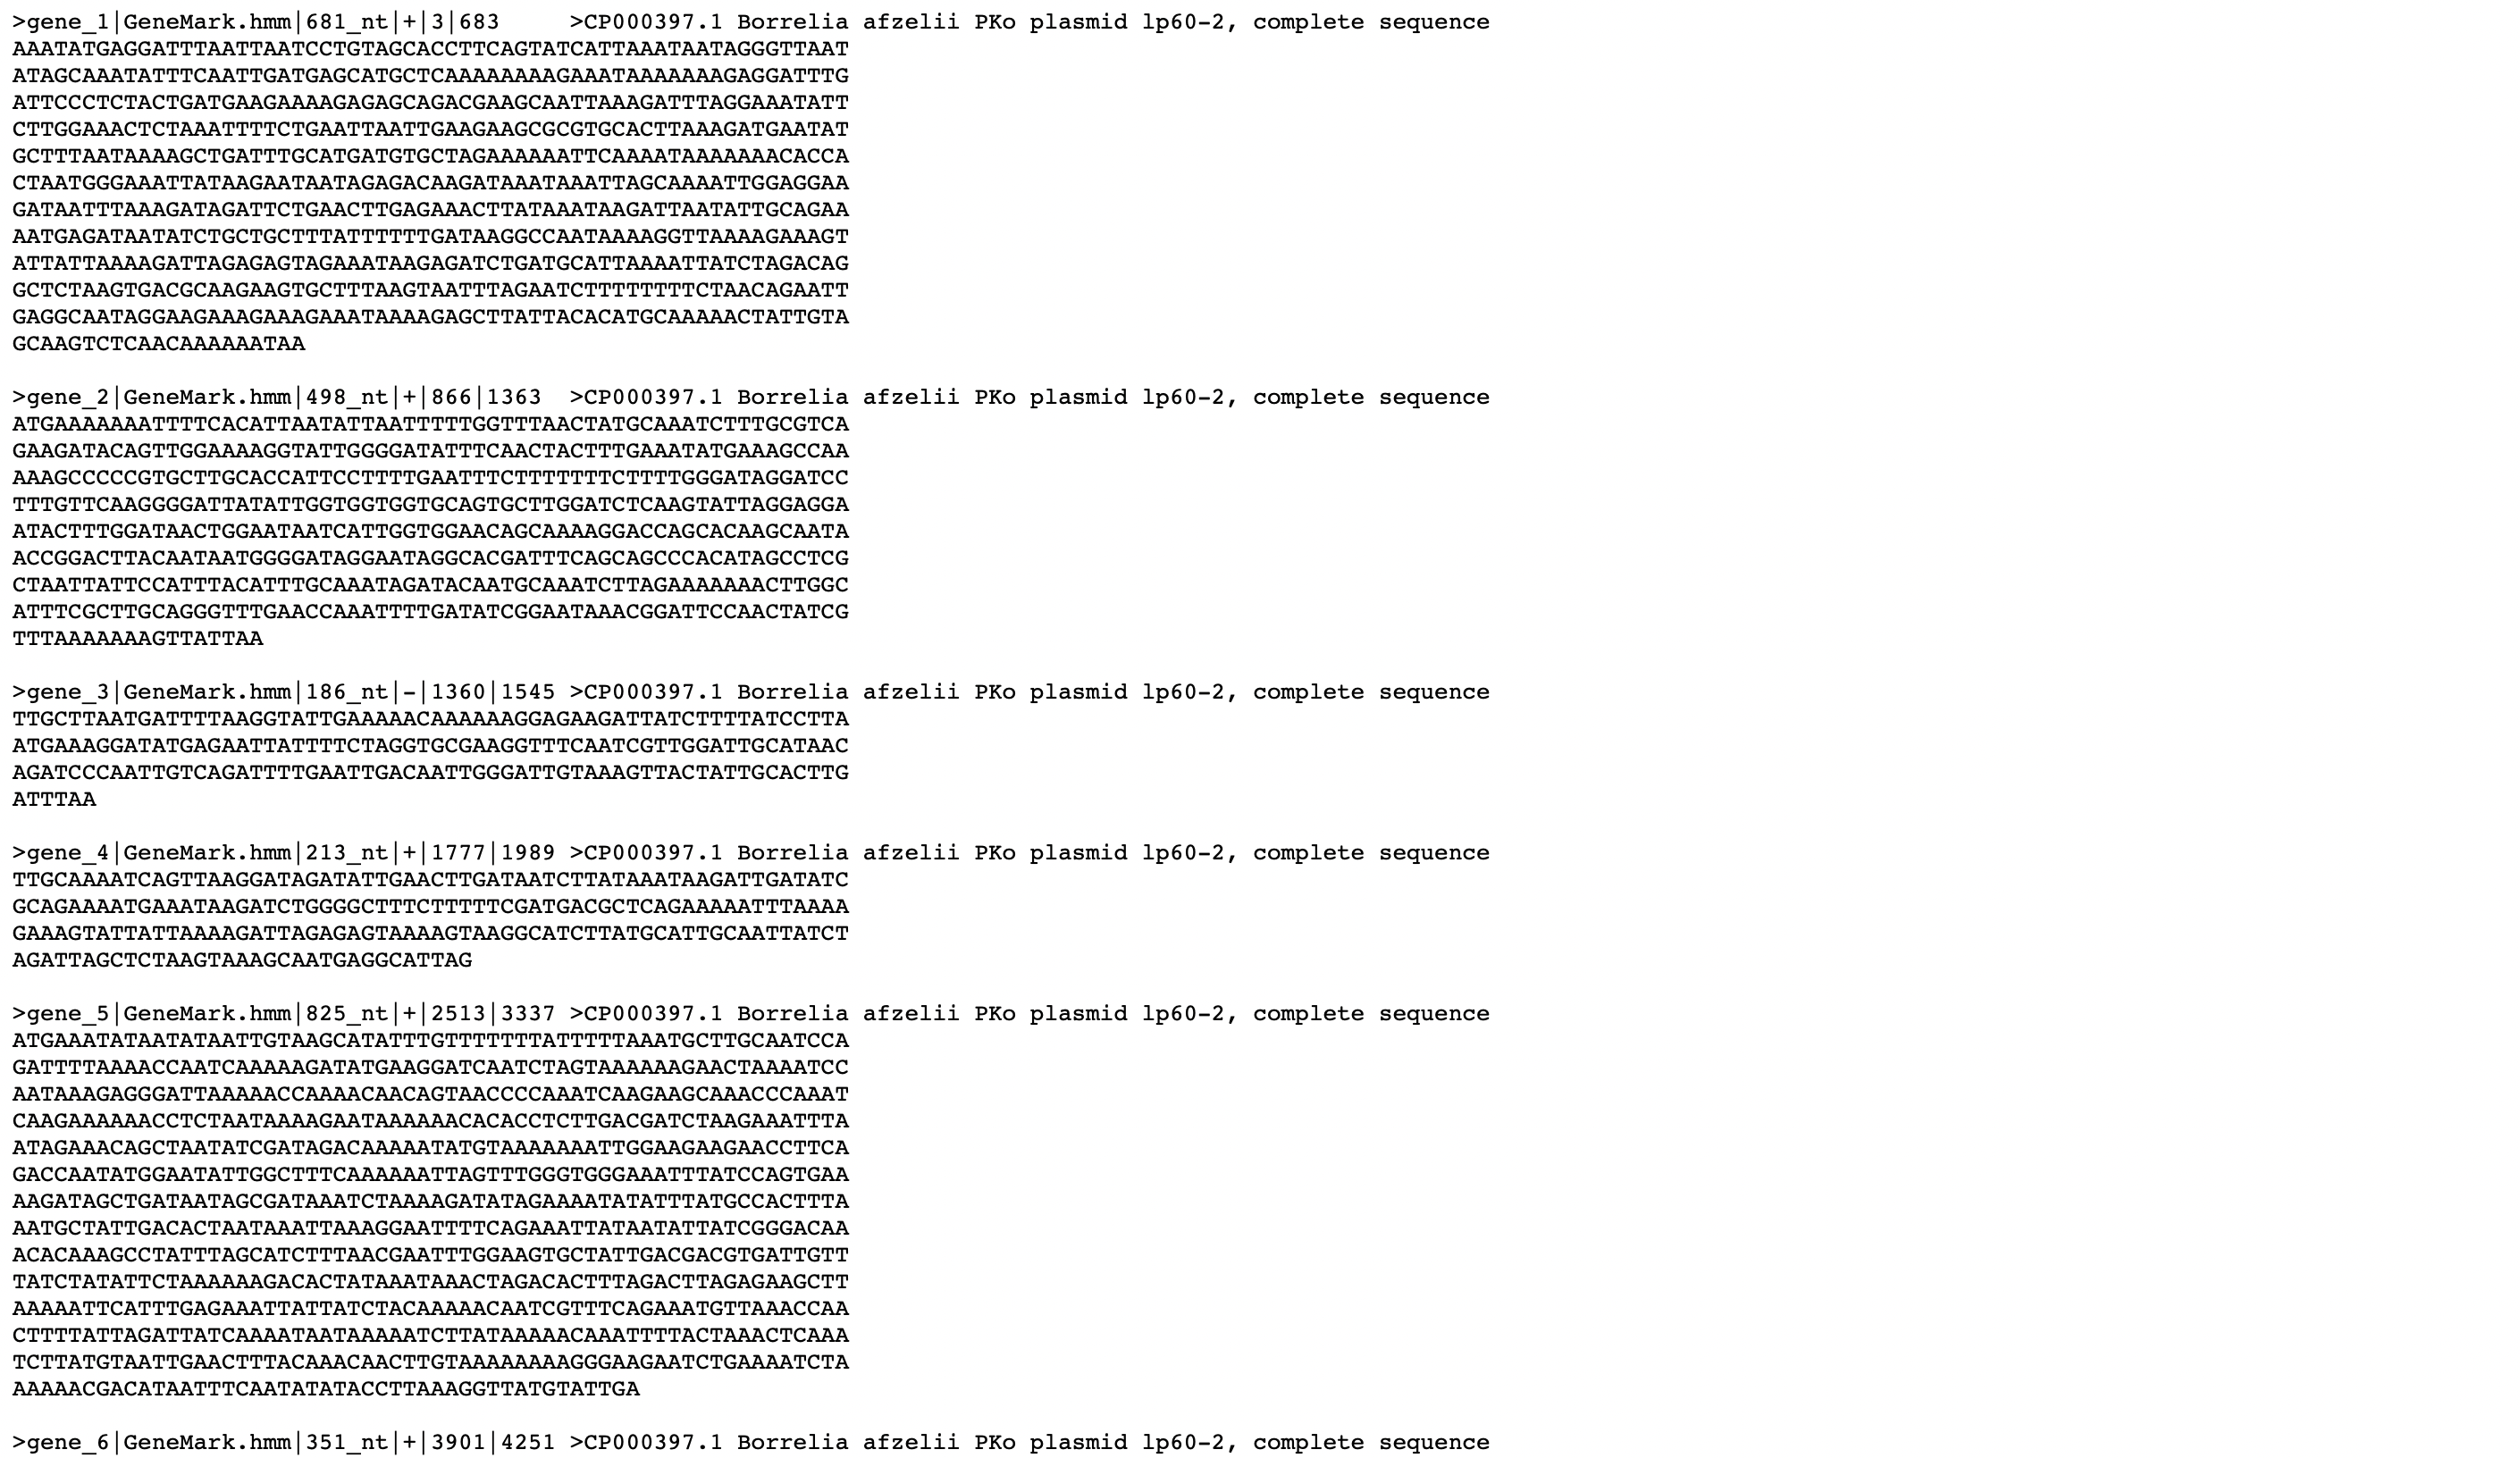

In [7]:
genes = []
with open("gmhmmp.out.fnn", "r") as f:
    data = f.readlines()
for line in data:
    if ">gene_" in line:
      print(line) 
      genes.append(line)

# "+" means direct orientation
# "-" means complement orientation

>gene_1|GeneMark.hmm|681_nt|+|3|683	>CP000397.1 Borrelia afzelii PKo plasmid lp60-2, complete sequence

>gene_2|GeneMark.hmm|498_nt|+|866|1363	>CP000397.1 Borrelia afzelii PKo plasmid lp60-2, complete sequence

>gene_3|GeneMark.hmm|186_nt|-|1360|1545	>CP000397.1 Borrelia afzelii PKo plasmid lp60-2, complete sequence

>gene_4|GeneMark.hmm|213_nt|+|1777|1989	>CP000397.1 Borrelia afzelii PKo plasmid lp60-2, complete sequence

>gene_5|GeneMark.hmm|825_nt|+|2513|3337	>CP000397.1 Borrelia afzelii PKo plasmid lp60-2, complete sequence

>gene_6|GeneMark.hmm|351_nt|+|3901|4251	>CP000397.1 Borrelia afzelii PKo plasmid lp60-2, complete sequence

>gene_7|GeneMark.hmm|681_nt|+|4400|5080	>CP000397.1 Borrelia afzelii PKo plasmid lp60-2, complete sequence

>gene_8|GeneMark.hmm|894_nt|+|5952|6845	>CP000397.1 Borrelia afzelii PKo plasmid lp60-2, complete sequence

>gene_9|GeneMark.hmm|3831_nt|-|7447|11277	>CP000397.1 Borrelia afzelii PKo plasmid lp60-2, complete sequence

>gene_10|GeneMark.hmm|255_nt|-|

Quantify the following indicators (in the form of a table or a diagram):
- the number (and the percentage of the total number in the source (input) file) of genes that are annotated in the GenBank database and for which the prediction of both ends of the gene using Genemark is exactly the same.

In [8]:
import pandas as pd

pd.set_option("display.max_columns", None)
df = pd.DataFrame([cds,genes])
df = df.replace(r"\n","" "", regex=True) 
df

0   \
0                           CDS             120..683   
1  >gene_1|GeneMark.hmm|681_nt|+|3|683\t>CP000397...   

                                                  1   \
0                          CDS             866..1363   
1  >gene_2|GeneMark.hmm|498_nt|+|866|1363\t>CP000...   

                                                  2   \
0             CDS             complement(1360..1545)   
1  >gene_3|GeneMark.hmm|186_nt|-|1360|1545\t>CP00...   

                                                  3   \
0                         CDS             1777..1989   
1  >gene_4|GeneMark.hmm|213_nt|+|1777|1989\t>CP00...   

                                                  4   \
0                         CDS             2513..3337   
1  >gene_5|GeneMark.hmm|825_nt|+|2513|3337\t>CP00...   

                                                  5   \
0                         CDS             3901..4251   
1  >gene_6|GeneMark.hmm|351_nt|+|3901|4251\t>CP00...   

                                                  6   \
0                         CDS             4400..5080   
1  >gene_7|GeneMark.hmm|681_nt|+|4400|5080\t>CP00...   

                                                  7   \
0                         CDS             5952..6845   
1  >gene_8|GeneMark.hmm|894_nt|+|5952|6845\t>CP00...   

                                                  8   \
0            CDS             complement(7447..11277)   
1  >gene_9|GeneMark.hmm|3831_nt|-|7447|11277\t>CP...   

                                                  9   \
0           CDS             complement(11397..11627)   
1  >gene_10|GeneMark.hmm|255_nt|-|11397|11651\t>C...   

                                                  10  \
0           CDS             complement(11700..11903)   
1  >gene_11|GeneMark.hmm|204_nt|-|11700|11903\t>C...   

                                                  11  \
0           CDS             complement(11818..11961)   
1  >gene_12|GeneMark.hmm|918_nt|+|12703|13620\t>C...   

                                                  12  \
0                       CDS             12703..13620   
1  >gene_13|GeneMark.hmm|567_nt|+|13613|14179\t>C...   

                                                  13  \
0                       CDS             13613..14179   
1  >gene_14|GeneMark.hmm|756_nt|+|14152|14907\t>C...   

                                                  14  \
0                       CDS             14152..14907   
1  >gene_15|GeneMark.hmm|630_nt|+|15003|15632\t>C...   

                                                  15  \
0                       CDS             15003..15632   
1  >gene_16|GeneMark.hmm|345_nt|+|15791|16135\t>C...   

                                                  16  \
0                       CDS             15791..16135   
1  >gene_17|GeneMark.hmm|261_nt|-|16914|17174\t>C...   

                                                  17  \
0                       CDS             16427..16534   
1  >gene_18|GeneMark.hmm|984_nt|-|17628|18611\t>C...   

                                                  18  \
0           CDS             complement(16914..17174)   
1  >gene_19|GeneMark.hmm|855_nt|+|19291|20145\t>C...   

                                                  19  \
0           CDS             complement(17628..18611)   
1  >gene_20|GeneMark.hmm|1011_nt|-|20892|21902\t>...   

                                                  20  \
0                       CDS             19291..20145   
1  >gene_21|GeneMark.hmm|549_nt|+|22598|23146\t>C...   

                                                  21  \
0           CDS             complement(20892..21902)   
1  >gene_22|GeneMark.hmm|483_nt|-|23546|24028\t>C...   

                                                  22  \
0                       CDS             22598..23146   
1  >gene_23|GeneMark.hmm|372_nt|-|24605|24976\t>C...   

                                                  23  \
0           CDS             complement(23546..24028)   
1  >gene_24|GeneMark.hmm|1176_nt|-|25621|26796\t>..

In [9]:
# assign data
annotated_genes = 47/56*100
data = {"genes annotated in Genbank": [47], "the overal number of found genes by Genemark": [56],
        "percent. of annotated genes": annotated_genes}  
my_df = pd.DataFrame(data)  
my_df

genes annotated in Genbank  the overal number of found genes by Genemark  \
0                          47                                            56   

   percent. of annotated genes  
0                    83.928571

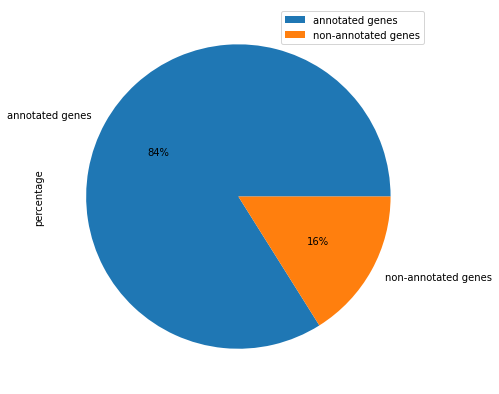

In [10]:
df = pd.DataFrame({"percentage": [annotated_genes, 100-annotated_genes]}, index=["annotated genes", "non-annotated genes"])
plot = df.plot.pie(y="percentage", figsize=(7,7), autopct="%1.0f%%")

- the number (+ the percentage) of genes for which the annotation of only the N-end of the protein does not match the annotation.

p.s do not forget to look at the orientation of the gene.

*N-Terminus (N-end)* (nitrogen terminus) - the 5-prime (5') end of the polypeptide chain that has a nitrogen atom or a 'free amino group'.. 

..Peptide bonds connect all of the amino acids of the chain together. When two or more amino acids are linked together, one end of the resulting molecule has a free amino group. Also referred to as the "amino terminus".

In terms of our case, we are looking the dif. both in the 5'-end of a gene that is located in a direct way and in the 3'-end of a gene that is located in a complement way (according to the df ('cds-genes') above).

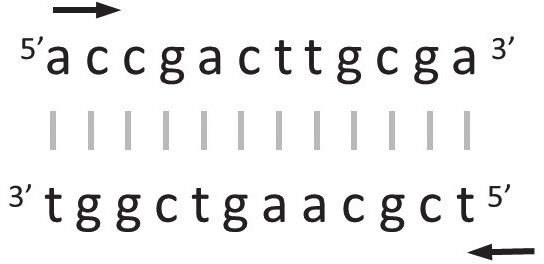

In [11]:
# assign data
genes_n = 5/56*100
data_n = {"genes with another protein N-end": [5], "the overal number of found genes by Genemark": [56],
        "percent. of genes with another protein N-end": genes_n}  
my_df_n = pd.DataFrame(data_n)  
my_df_n

genes with another protein N-end  \
0                                 5   

   the overal number of found genes by Genemark  \
0                                            56   

   percent. of genes with another protein N-end  
0                                      8.928571

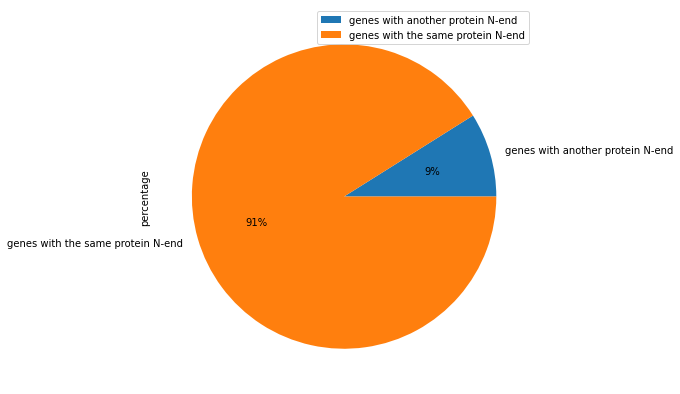

In [12]:
df_n = pd.DataFrame({"percentage": [genes_n, 100-genes_n]}, index=["genes with another protein N-end", "genes with the same protein N-end"])
plot = df_n.plot.pie(y="percentage", figsize=(7,7), autopct="%1.0f%%")

- the number (+ the percentage) of genes for which the annotation of only the C-end of the protein does not match the annotation.

*C-Terminus (C-end)* (carboxyl terminus) - the 3-prime (3') end (or 'terminus') of the amino acid chain. It has a free carboxyl group (COOH).

In terms of our case, we are looking the dif. both in the 3'-end of a gene that is located in a direct way and in the 5'-end of a gene that is located in a complement way (according to the df ('cds-genes') above).

In [13]:
# assign data
genes_c = 0/56*100
data_c = {"genes with another protein C-end": [0], "the overal number of found genes by Genemark": [56],
        "percent. of genes with another protein C-end": genes_c}  
my_df_c = pd.DataFrame(data_c)  
my_df_c

genes with another protein C-end  \
0                                 0   

   the overal number of found genes by Genemark  \
0                                            56   

   percent. of genes with another protein C-end  
0                                           0.0

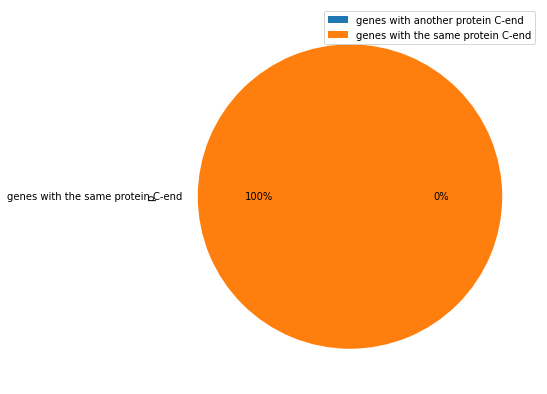

In [14]:
df_c = pd.DataFrame({"p": [genes_c, 100-genes_c]}, index=["genes with another protein C-end", "genes with the same protein C-end"])
plot = df_c.plot.pie(figsize=(7,7), autopct="%1.0f%%",y="p")

- the number (+ the percentage) of genes for which the annotation of both ends of the protein does not match the annotation.

In [15]:
# assign data
genes_b = 7/59*100
data_b = {"genes with another protein C/N-ends": [7], "the overal number of annotated genes by Genbank": [59],
        "percent. of genes with another protein C/N-ends": genes_b}  
my_df_b = pd.DataFrame(data_b)  
my_df_b

genes with another protein C/N-ends  \
0                                    7   

   the overal number of annotated genes by Genbank  \
0                                               59   

   percent. of genes with another protein C/N-ends  
0                                        11.864407

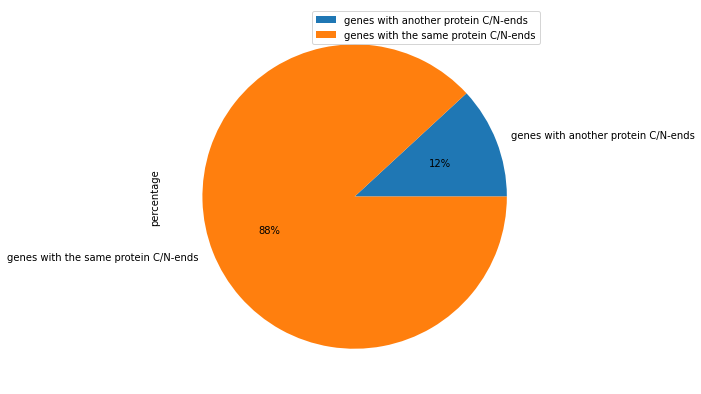

In [16]:
df_b = pd.DataFrame({"percentage": [genes_b, 100-genes_b]}, index=["genes with another protein C/N-ends", 
                                                          "genes with the same protein C/N-ends"])
plot = df_b.plot.pie(figsize=(7,7), autopct="%1.0f%%",y="percentage")

- the number of predicted (by Genemark) genes that do not overlap with the genes from the record (from Genbank).

*Overlapping genes (OLGs)* are two adjacent DNA segments that are partially or entirely overlapped with each other through a shared genomic location. These genes are present in the viral, prokaryotic, and eukaryotic genomes.

In [17]:
# assign data
genes_g = 2/56*100
data_g = {"genes that do not overlap with the genes from the Genbank record": [2], 
          "the overal number of annotated genes by Genbank": [56],
        "percent. of genes that do not overlap with the genes from the Genbank record": genes_g}  
my_df_g = pd.DataFrame(data_g)  
my_df_g

genes that do not overlap with the genes from the Genbank record  \
0                                                  2                  

   the overal number of annotated genes by Genbank  \
0                                               56   

   percent. of genes that do not overlap with the genes from the Genbank record  
0                                           3.571429

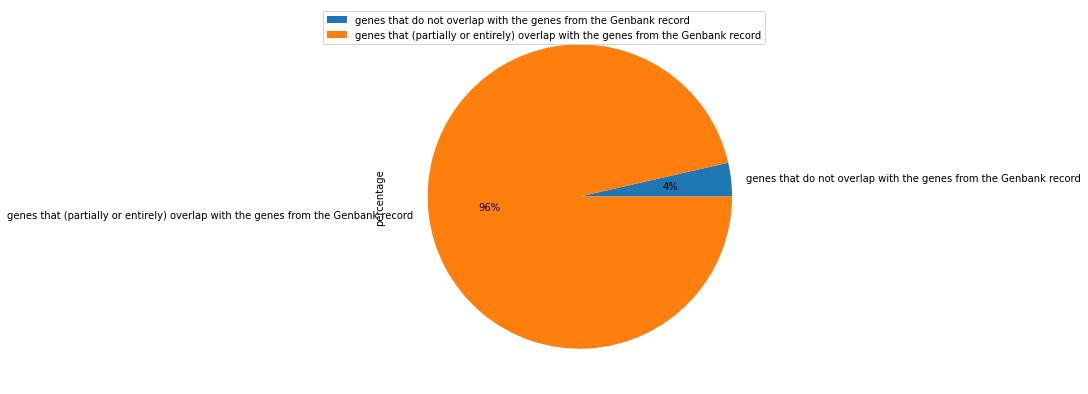

In [18]:
df_g = pd.DataFrame({"percentage": [genes_g, 100-genes_g]}, 
                    index=["genes that do not overlap with the genes from the Genbank record", 
                          "genes that (partially or entirely) overlap with the genes from the Genbank record"])
plot = df_g.plot.pie(figsize=(7,7), autopct="%1.0f%%",y="percentage")

- the number of genes in the record that do not overlap with predictions.

In [19]:
# assign data
genes_gg = 3/59*100
data_gg = {"genes that do not overlap with the genes from the Genbank record": [3], 
          "the overal number of annotated genes by Genbank": [59],
        "percent. of genes that do not overlap with the genes from the Genbank record": genes_gg}  
my_df_gg = pd.DataFrame(data_gg)  
my_df_gg

genes that do not overlap with the genes from the Genbank record  \
0                                                  3                  

   the overal number of annotated genes by Genbank  \
0                                               59   

   percent. of genes that do not overlap with the genes from the Genbank record  
0                                           5.084746

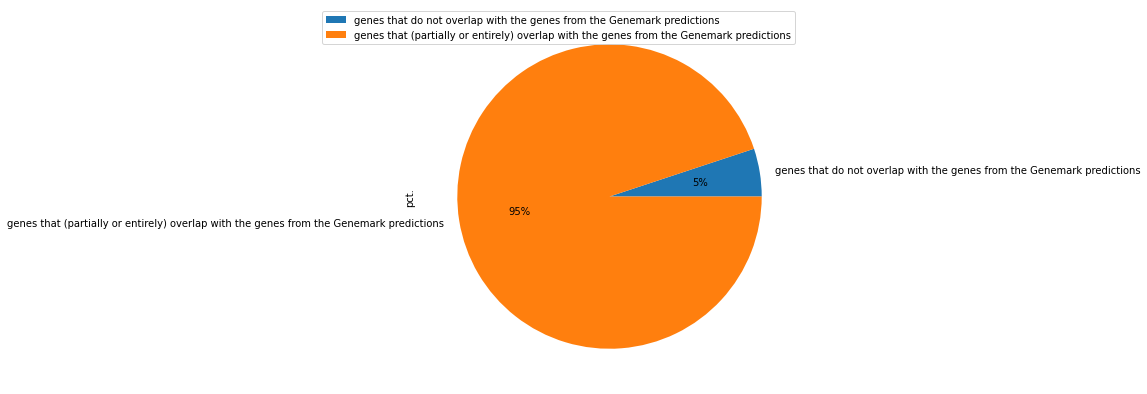

In [20]:
df_gg = pd.DataFrame({"pct.": [genes_gg, 100-genes_gg]}, 
                    index=["genes that do not overlap with the genes from the Genemark predictions", 
                          "genes that (partially or entirely) overlap with the genes from the Genemark predictions"])
plot = df_gg.plot.pie(figsize=(7,7), autopct="%1.0f%%",y="pct.")

To do this, we could use biopython (python), GenomicRanges (R), bedtools bedops awk (bash) or something else.

Additional subtask: In the case, when the annotation on one of the ends of the gene did not match, try to explain the reason for the discrepancy.

R: The reason of that is greatly explained in the articles https://academic.oup.com/nar/article/26/4/1107/2902172 and http://www.marcottelab.org/users/BCH339N_2016/GeneMark.hmm.pdf :

"However, the 5′ boundary of the gene (the translation initiation codon associated with the protein N-terminus) might not be precisely predicted" [1].

"..it might be hard to exactly predict the 5′-end of the gene whose translation initiation codon and ribosome binding site fall into the overlap region where oligonucleotide statistics may not fit to regularly used models" [2].

"..the exact prediction of the N-terminus is important for further functional analysis of a putative protein, and, eventually, for correct annotation of thousands of genes in growing databases" [1].

1.4 Upload the prediction and the markup from the database to IGV (https://software.broadinstitute.org/software/igv/) and screen it.

*The Integrative Genomics Viewer (IGV)* is an interactive tool for the visual exploration of genomic data. It supports flexible integration of all the common types of genomic data and metadata.

To run IGV, we need to obtain full nucleotide seq fasta file (from NCBI) and to convert both two genes fasta/fnn files into bed files.

more about bed files is written here: https://en.wikipedia.org/wiki/BED_(file_format).

In [21]:
# make fasta file
filename = "CP000397.1.fasta"
if not os.path.isfile(filename):
  net_handle = Entrez.efetch(db="nucleotide", id="CP000397.1", rettype="fasta", retmode="text")
  out_handle = open(filename, "w")
  out_handle.write(net_handle.read())
  out_handle.close()
  net_handle.close()

record = SeqIO.read(filename, "fasta")
print(record)

ID: CP000397.1
Name: CP000397.1
Description: CP000397.1 Borrelia afzelii PKo plasmid lp60-2, complete sequence
Number of features: 0
Seq('AGAAATATGAGGATTTAATTAATCCTGTAGCACCTTCAGTATCATTAAATAATA...GTT')


In [22]:
# create genemark bed file
genes = [sub.replace("\t","|") for sub in genes]
df = pd.DataFrame([sub.split("|") for sub in genes])
df.head()

0             1       2  3     4     5  \
0  >gene_1  GeneMark.hmm  681_nt  +     3   683   
1  >gene_2  GeneMark.hmm  498_nt  +   866  1363   
2  >gene_3  GeneMark.hmm  186_nt  -  1360  1545   
3  >gene_4  GeneMark.hmm  213_nt  +  1777  1989   
4  >gene_5  GeneMark.hmm  825_nt  +  2513  3337   

                                                   6  
0  >CP000397.1 Borrelia afzelii PKo plasmid lp60-...  
1  >CP000397.1 Borrelia afzelii PKo plasmid lp60-...  
2  >CP000397.1 Borrelia afzelii PKo plasmid lp60-...  
3  >CP000397.1 Borrelia afzelii PKo plasmid lp60-...  
4  >CP000397.1 Borrelia afzelii PKo plasmid lp60-...

In [23]:
start = []
for row in df.itertuples():
  start.append(row[5])

end = []
for row in df.itertuples():
  end.append(row[6])

strand = []
for row in df.itertuples():
  strand.append(row[4])

In [24]:
with open("genemark.bed", "w") as file:
  for element, st, en, s in zip(genes,start,end,strand):
      file.write("CP000397.1" + "\t" + st + "\t" + en + "\t" + s)
      file.write("\n")

In [25]:
# create genbank bed file
cds = [sub.replace(".."," ") for sub in cds]
cds = [sub.replace("(","") for sub in cds]
cds = [sub.replace(")","") for sub in cds]
dff = pd.DataFrame([sub.split(" ") for sub in cds])
dff = dff.replace(r"\n","" "", regex=True)
dff = dff[dff.columns[18:20]]
dff[20] = "+"
dff.columns = ['start', 'end', 'strand']
dff.head()

start   end strand
0             120   683      +
1             866  1363      +
2  complement1360  1545      +
3            1777  1989      +
4            2513  3337      +

In [26]:
strand = []
for index, row in dff.iterrows():
  if len(row.start) > 9:
    strand.append("-")
  else:
    strand.append("+")

start = []
for index, row in dff.iterrows():
  if len(row.start) > 9:
    start.append(row.start[10:])
  else:
    start.append(row.start)

end = []
for index, row in dff.iterrows():
  end.append(row.end)

In [27]:
with open("genbank.bed", "w") as file:
  for element, st, en, s in zip(genes,start,end,strand):
      file.write("CP000397.1" + "\t" + st + "\t" + en + "\t" + s)
      file.write("\n")

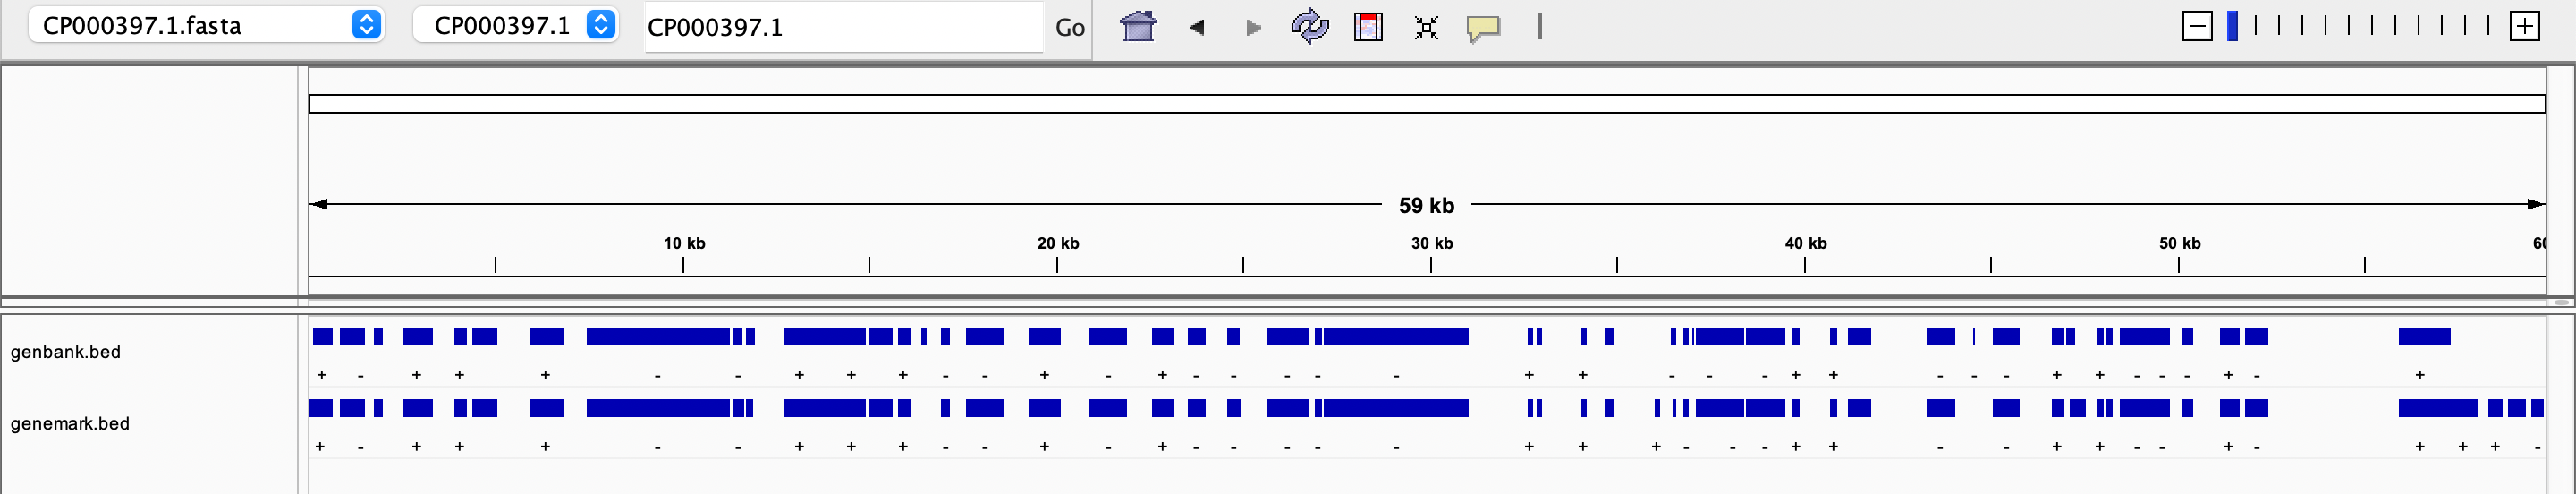

## Task 2. Prediction of genes and protein-coding regions in the observed scaffold.

*A scaffold* is a portion of the genome sequence reconstructed from end-sequenced whole-genome shotgun clones. [Scaffolds are composed of contigs and gaps. A contig is a contiguous length of genomic sequence in which the order of bases is known to a high confidence level.]

The observed scaffold is 
KV453872.1.

Predict the genes and protein-coding regions in the contig by the AUGUSTUS web server.

AUGUSTUS is a program that predicts genes in genomic sequences.

p.s. if the new server is overloaded, we can use the old one:

http://bioinf.uni-greifswald.de/webaugustus/prediction/create or http://bioinf.uni-greifswald.de/augustus/submission.php.

It is needed to select the organism which is the closest in taxonomy to the one from Task 1:

"/organism=Borreliella afzelii PKo
/taxonomy=['Bacteria', 'Spirochaetes', 'Spirochaetales', 'Borreliaceae', 'Borreliella']" -> cause Augustus species list contains only the 3 possible bacteria (Escherichia coli, Staphylococcus aureus, Thermoanaerobacter tengcongensis) I've selected Staphylococcus aureus due to their possible relation (?).

(in terms of the existing paper "Phylogeography of Lyme borreliosis-group spirochetes and methicillin-resistant Staphylococcus aureus" (https://www.cambridge.org/core/journals/parasitology/article/abs/phylogeography-of-lyme-borreliosisgroup-spirochetes-and-methicillinresistant-staphylococcus-aureus/412664EAE7F895682AD92A023381AC93).

Parameters that were selected:
- Species: Staphylococcus aureus,
- Alternative transcripts: few (cause it is default one),
- Allowed gene structure: predict any number of (possibly partial) genes (this option is set by default. Augustus may predict no gene at all, one or more genes. The genes at the boundaries of the input sequence may be partial. Partial here means that not all of the exons of a gene are contained in the input sequence, but it is assumed that the sequence starts or ends in a non-coding region.)

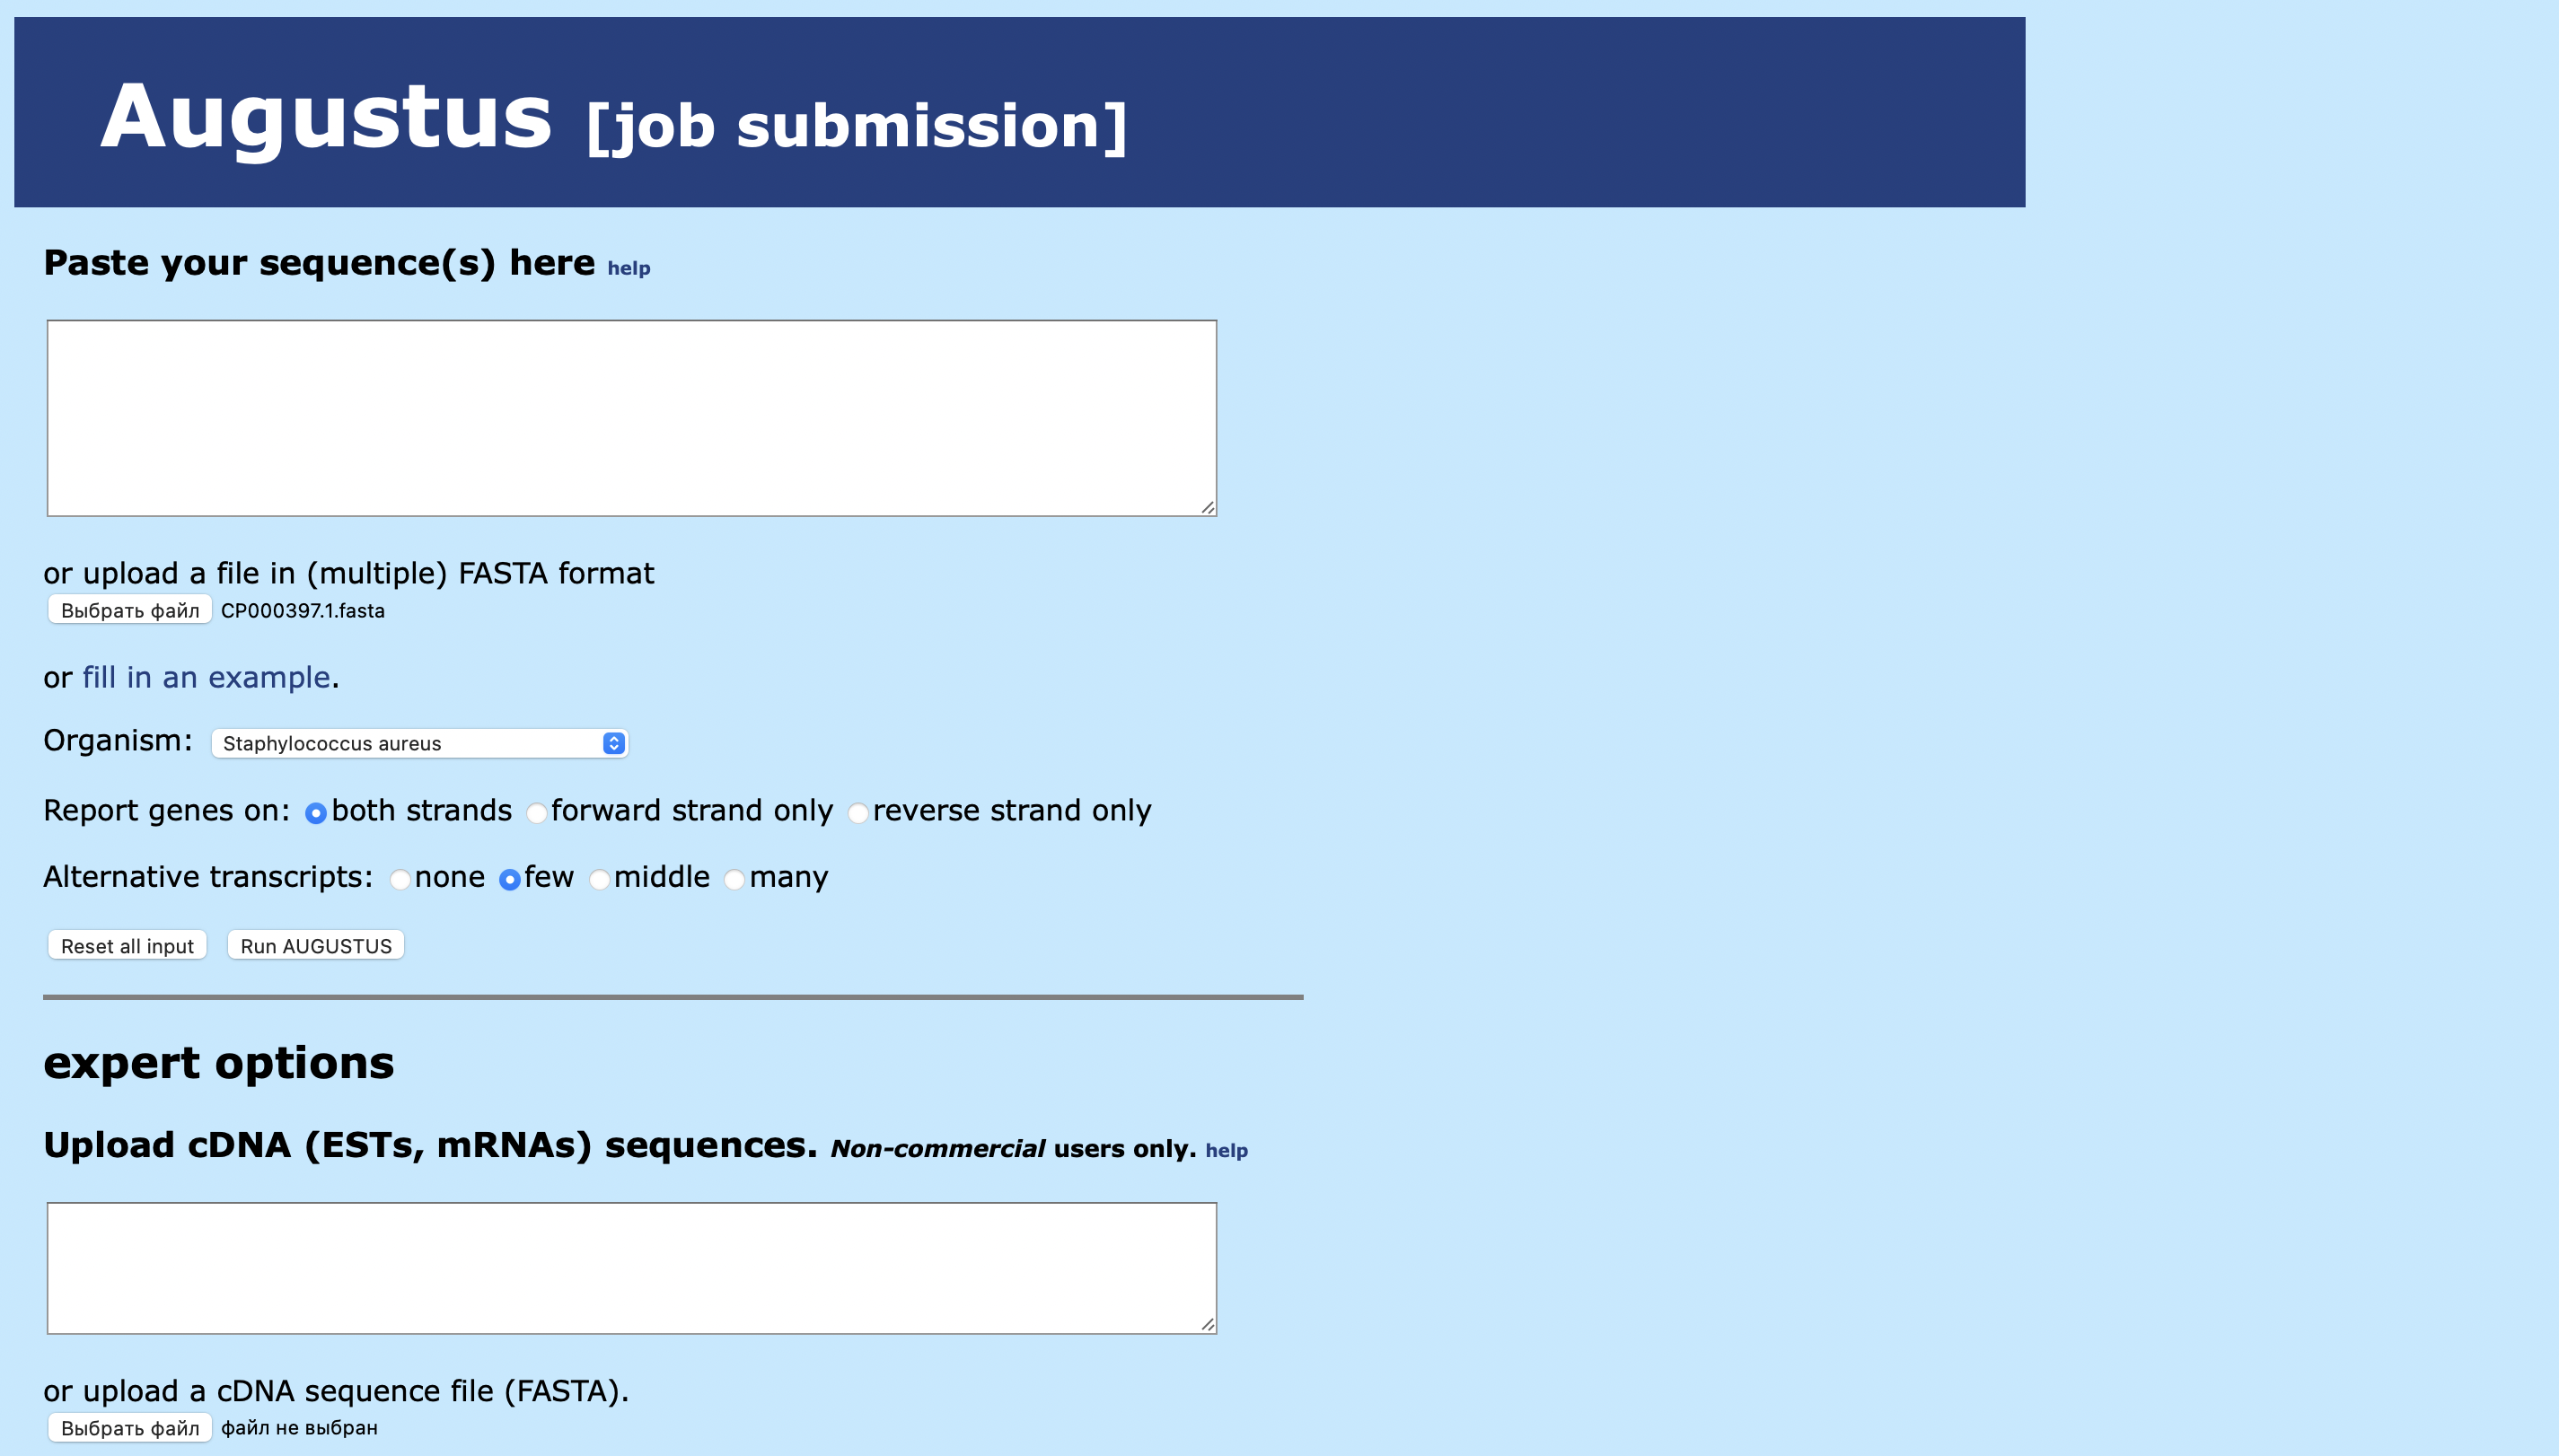

what the program outputs (attach a file containing gene predictions):

In [28]:
with open('augustus.gff') as f:
  lines = f.readlines()
  
augustus = []
for line in lines:
  if "CP000397.1\t" in line:
    augustus.append(line)

In [29]:
df = pd.DataFrame([sub.split("\t") for sub in augustus])
df = df.drop(df.columns[[0,1,5,7,8]], axis=1)
df = df[df[2] == "gene"]
df

2      3      4  6
0    gene    120    683  +
6    gene    866   1363  +
12   gene   1360   1545  -
18   gene   1558   1620  -
24   gene   1617   1694  -
30   gene   1729   1989  +
36   gene   2494   2568  -
42   gene   2513   3337  +
48   gene   4846   5040  -
54   gene   5952   6845  +
60   gene   7447  11277  -
66   gene  11397  11531  -
72   gene  11700  11903  -
78   gene  12703  13620  +
84   gene  13613  14179  +
90   gene  14152  14907  +
96   gene  15003  15632  +
102  gene  15791  16135  +
108  gene  16914  17174  -
114  gene  17628  18611  -
120  gene  19291  20145  +
126  gene  20892  21902  -
132  gene  22598  23146  +
138  gene  23546  24094  -
144  gene  24605  24976  -
150  gene  25621  26796  -
156  gene  26919  27104  -
162  gene  27194  31027  -
168  gene  34705  34941  +
174  gene  37128  37880  -
180  gene  37856  38410  -
186  gene  38452  39522  -
192  gene  41188  41796  -
198  gene  43297  44079  -
204  gene  45087  45770  -
210  gene  46566  46649  -
216  gene  46636  46971  +
222  gene  47854  48042  +
228  gene  48442  49368  -
234  gene  49361  49819  -
240  gene  50125  50427  -
246  gene  51127  51678  +
252  gene  51837  52424  -
258  gene  55948  57054  +
264  gene  57064  57300  +
270  gene  57257  58045  +
276  gene  58340  58684  +
282  gene  58870  59328  +

If we compare the Augustus results both w/ the Genbank records and w/ the Genemark predictions we may find out pretty big number of similar results. Moreover, it is worth to note that the Augustus result contains bigger amount of predictions than the Genbank records/the Genemark predictions.